# Proyecto # 1 - 1a Parte
## Product Development - Ing. Preng Biba
### Hugo Brian Bay Rojas - Carnet 20002544

## 1. Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Carga del Dataset
data = pd.read_csv('Engineering_graduate_salary.csv')
print(str(data.shape) + '\n')
data.head()

(2998, 34)



,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


### 1.1. Drop de columnas de ID

In [3]:
# Identificamos todas las columnas de ID
cols_id = [var for var in data.columns if (('ID' in var) or ('Id' in var))]
cols_id

['ID', 'CollegeID', 'CollegeCityID']

Verificamos que tanto la variable CollegeID como CollegeCityID tienen los mismos datos, por lo que eliminaremos una de ellas.

In [16]:
(data['CollegeID'] == data['CollegeCityID']).value_counts()

True    2998
dtype: int64

In [17]:
data.drop(['ID', 'CollegeCityID'], axis=1, inplace=True)
print(str(data.shape))

(2998, 32)


### 1.2. Análisis del Target

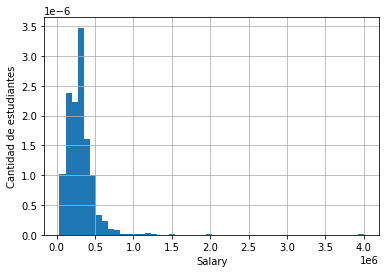

In [26]:
data['Salary'].hist(bins=50, density=True)
plt.xlabel('Salary')
plt.ylabel('Cantidad de estudiantes')
plt.show()

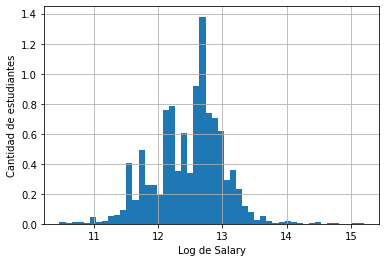

In [25]:
# transformación del target con log
np.log(data['Salary']).hist(bins=50, density=True)
plt.xlabel('Log de Salary')
plt.ylabel('Cantidad de estudiantes')
plt.show()

La variable tiene una mejora en su distribución luego de la transformación logarítmica.  Por lo que la decisión en cuanto al target es aplicar esta transformación al modelo.

### 1.3. Verificación de tipos de variables

In [43]:
# Variables categóricas
cat_vars = [var for var in data.columns if data[var].dtype == 'O']
cat_vars = cat_vars + ['CollegeID']
cat_vars

['Gender',
 'DOB',
 '10board',
 '12board',
 'Degree',
 'Specialization',
 'CollegeState',
 'CollegeID']

In [47]:
print('Cantidad de variables categóricas: ', len(cat_vars))

Cantidad de variables categóricas:  8


In [44]:
#V ariables numéricas
num_vars = [var for var in data.columns if(var not in cat_vars and var != 'Salary')]
num_vars

['10percentage',
 '12graduation',
 '12percentage',
 'CollegeTier',
 'collegeGPA',
 'CollegeCityTier',
 'GraduationYear',
 'English',
 'Logical',
 'Quant',
 'Domain',
 'ComputerProgramming',
 'ElectronicsAndSemicon',
 'ComputerScience',
 'MechanicalEngg',
 'ElectricalEngg',
 'TelecomEngg',
 'CivilEngg',
 'conscientiousness',
 'agreeableness',
 'extraversion',
 'nueroticism',
 'openess_to_experience']

In [46]:
print('Cantidad de variables numéricas: ',len(num_vars))

Cantidad de variables numéricas:  23


### 1.4. Análisis de valores faltantes

In [48]:
var_with_na = [var for var in data.columns if(data[var].isnull().sum() > 0)]
print('Cantidad de variables con NAs:', len(var_with_na))

Cantidad de variables con NAs: 0


### 1.5. Análisis de variables temporales

La variable 'DOB' indica la fecha de nacimiento de cada estudiante.  La variable '12Graduation' indica el año de graduación.  Estas son las únicas dos variables temporales.  De estas dos se puede obtener la edad que cada alumno tenía al graduarse, lo cual puede ser un mejor indicador respecto al salario.

In [64]:
temp_vars = ['DOB', '12graduation', 'GraduationYear']
temp_vars

['DOB', '12graduation', 'GraduationYear']

In [65]:
data[['DOB','12graduation', 'GraduationYear']]

,DOB,12graduation,GraduationYear
0,1990-10-22,2009,2013
1,1990-05-15,2010,2014
2,1989-08-21,2007,2011
3,1991-05-04,2009,2013
4,1990-10-30,2008,2012
...,...,...,...
2993,1989-04-17,2005,2010
2994,1991-07-22,2008,2012
2995,1988-11-24,2006,2011
2996,1988-08-25,2006,2011


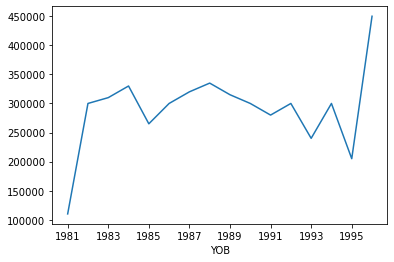

In [53]:
df = data.copy()
df['YOB'] = data['DOB'].str[0:4]
df.groupby('YOB')['Salary'].median().plot()
plt.show()

El año de nacimiento por sí solo no parece tener ninguna tendencia o impacto sobre la variable objetivo.

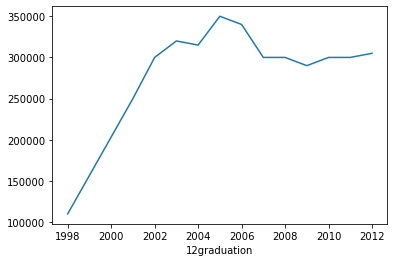

In [54]:
df.groupby('12graduation')['Salary'].median().plot()
plt.show()

Según la gráfica de arriba, parece que hay un crecimiento significativo en los graduados de high school entre el año 1998 y 2002.  Los graduados a partir de ese año en adelante al parecer reciben un salario muy similar.

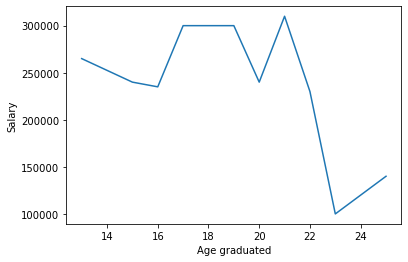

In [57]:
df['Age_grad'] = df['12graduation'] - df['YOB'].astype('int')
df.groupby('Age_grad')['Salary'].median().plot()
plt.xlabel('Age graduated')
plt.ylabel('Salary')
plt.show()

Al calcular la edad de graduación de los estudiantes, pareciera que hay cierta tendencia a que el salario es menor para las personas que se graduaron de una mayor edad que los estudiantes graduados más jóvenes.

In [81]:
df['GraduationYear'].value_counts()

2013    884
2014    784
2012    641
2011    382
2010    214
2015     64
2009     16
2017      7
2016      4
2007      1
0         1
Name: GraduationYear, dtype: int64

Se identificó en la variable 'GraduationYear' un dato que no tiene año de graduación, por ser solamente uno, se le asigna el año que más observaciones tiene.

In [82]:
df['GraduationYear'] = np.where(df['GraduationYear'] == 0, 2013, df['GraduationYear'])
df['GraduationYear'].value_counts()

2013    885
2014    784
2012    641
2011    382
2010    214
2015     64
2009     16
2017      7
2016      4
2007      1
Name: GraduationYear, dtype: int64

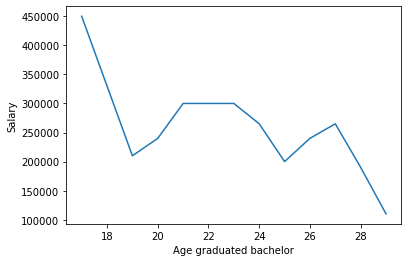

In [83]:
df['Age_grad_univ'] = df['GraduationYear'] - df['YOB'].astype('int')
df.groupby('Age_grad_univ')['Salary'].median().plot()
plt.xlabel('Age graduated bachelor')
plt.ylabel('Salary')
plt.show()

Se puede obervar una mayor correlación entre la edad de graduación de la universidad y el salario, mientras mayor edad tenía el estudiante al graduarse de la universidad el salario es menor.

### 1.6. Análisis de variables numéricas

#### 1.6.1. Discretas

In [84]:
discrete_vars = [var for var in num_vars if((len(data[var].unique()) <20) and (var not in temp_vars))]
discrete_vars

['CollegeTier', 'CollegeCityTier', 'ComputerScience', 'CivilEngg']

In [85]:
print('Cantidad de variables discretas: ', len(discrete_vars))

Cantidad de variables discretas:  4


In [86]:
data[discrete_vars].head()

,CollegeTier,CollegeCityTier,ComputerScience,CivilEngg
0,1,1,-1,-1
1,2,0,-1,-1
2,2,0,-1,-1
3,1,1,-1,-1
4,2,1,-1,-1


In [87]:
import seaborn as sns

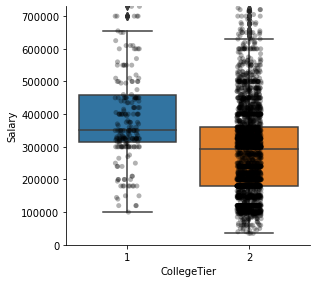

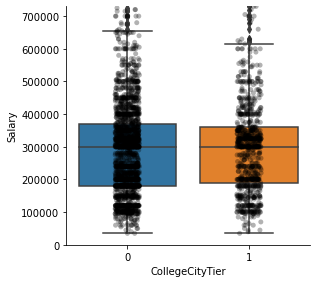

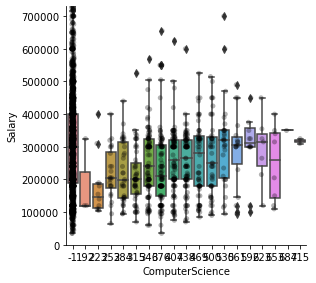

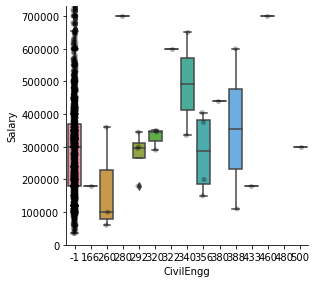

In [100]:
for var in discrete_vars:
    ylim_sup = data['Salary'].mean() + (data['Salary'].std()*2)
    sns.catplot(x=var, y='Salary', data=data, kind='box', height=4)
    sns.stripplot(x=var, y='Salary', data=data, jitter=0.1, alpha=0.3, color='k')
    plt.ylim([0, ylim_sup])
    plt.show()

#### 1.6.2. Contínuas

In [162]:
cont_vars = [var for var in num_vars if var not in discrete_vars + temp_vars]
cont_vars

['10percentage',
 '12percentage',
 'collegeGPA',
 'English',
 'Logical',
 'Quant',
 'Domain',
 'ComputerProgramming',
 'ElectronicsAndSemicon',
 'MechanicalEngg',
 'ElectricalEngg',
 'TelecomEngg',
 'conscientiousness',
 'agreeableness',
 'extraversion',
 'nueroticism',
 'openess_to_experience']

In [163]:
print("Variables numéricas continuas: ", len(cont_vars))

Variables numéricas continuas:  17


<function matplotlib.pyplot.show(close=None, block=None)>

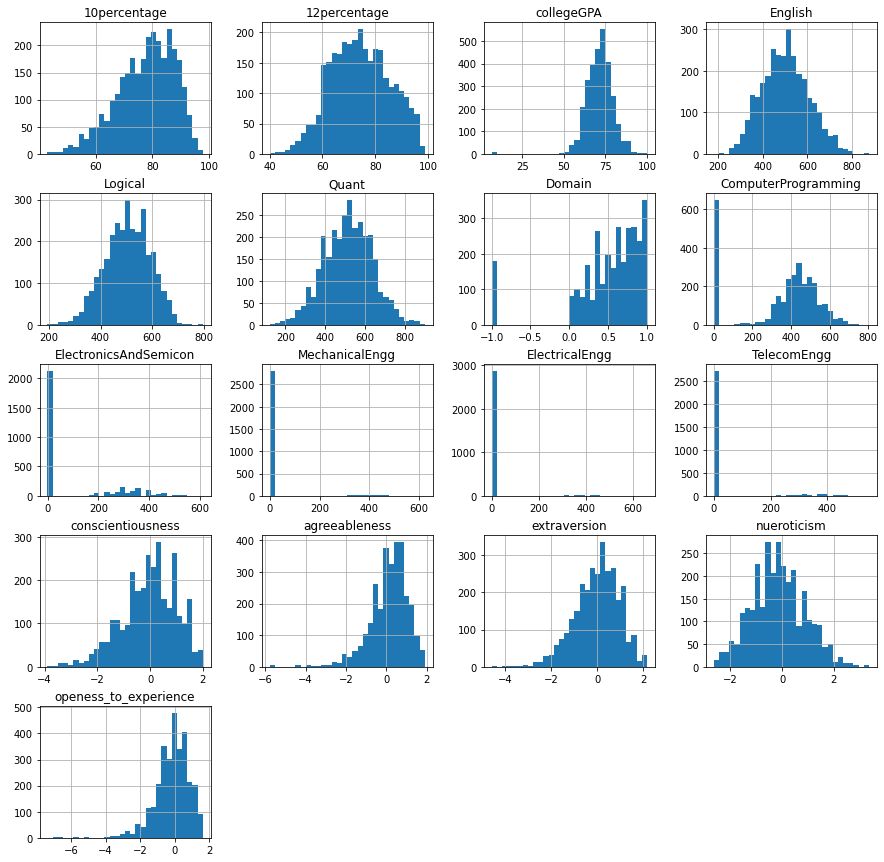

In [103]:
data[cont_vars].hist(bins=30, figsize=(15, 15))
plt.show

In [164]:
sesgadas = ['ElectronicsAndSemicon', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg']
cont_vars = [var for var in cont_vars if var not in sesgadas]
cont_vars

['10percentage',
 '12percentage',
 'collegeGPA',
 'English',
 'Logical',
 'Quant',
 'Domain',
 'ComputerProgramming',
 'conscientiousness',
 'agreeableness',
 'extraversion',
 'nueroticism',
 'openess_to_experience']

Se identificaron 4 variables con sesgo muy fuerte, las cuales deberán ser binarizadas

##### Yeo Johnson

In [105]:
import scipy.stats as stats

<function matplotlib.pyplot.show(close=None, block=None)>

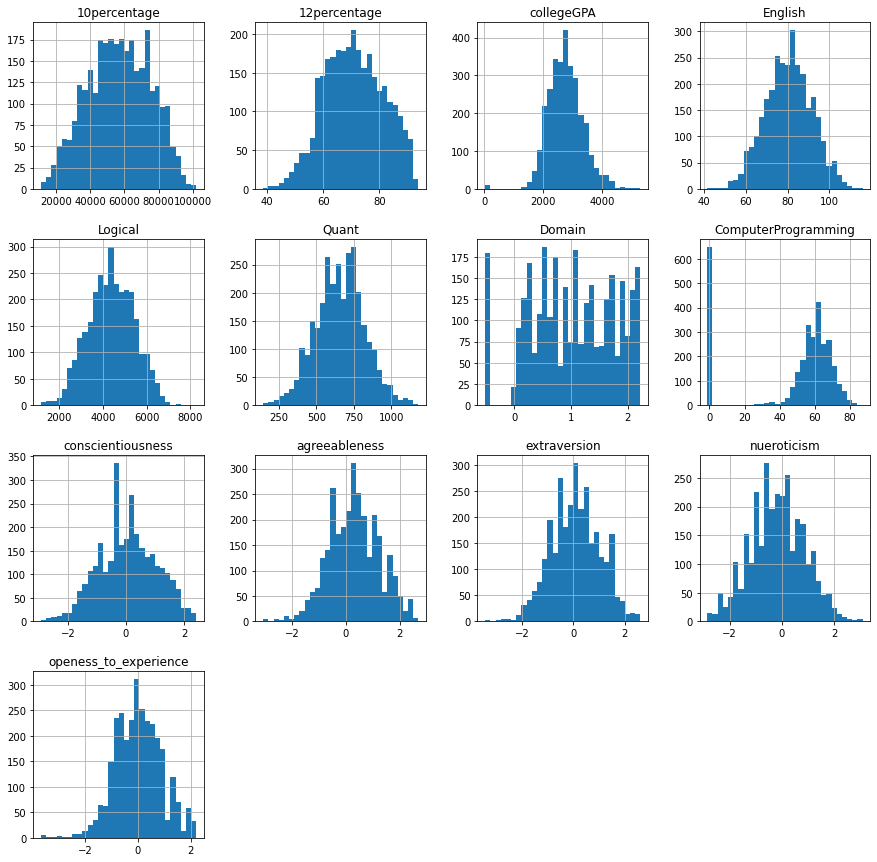

In [165]:
temp_yj = data.copy()

for var in cont_vars:
    temp_yj[var], param = stats.yeojohnson(data[var])
    
temp_yj[cont_vars].hist(bins=30, figsize=(15, 15))
plt.show

C:\Users\Brian\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<function matplotlib.pyplot.show(close=None, block=None)>

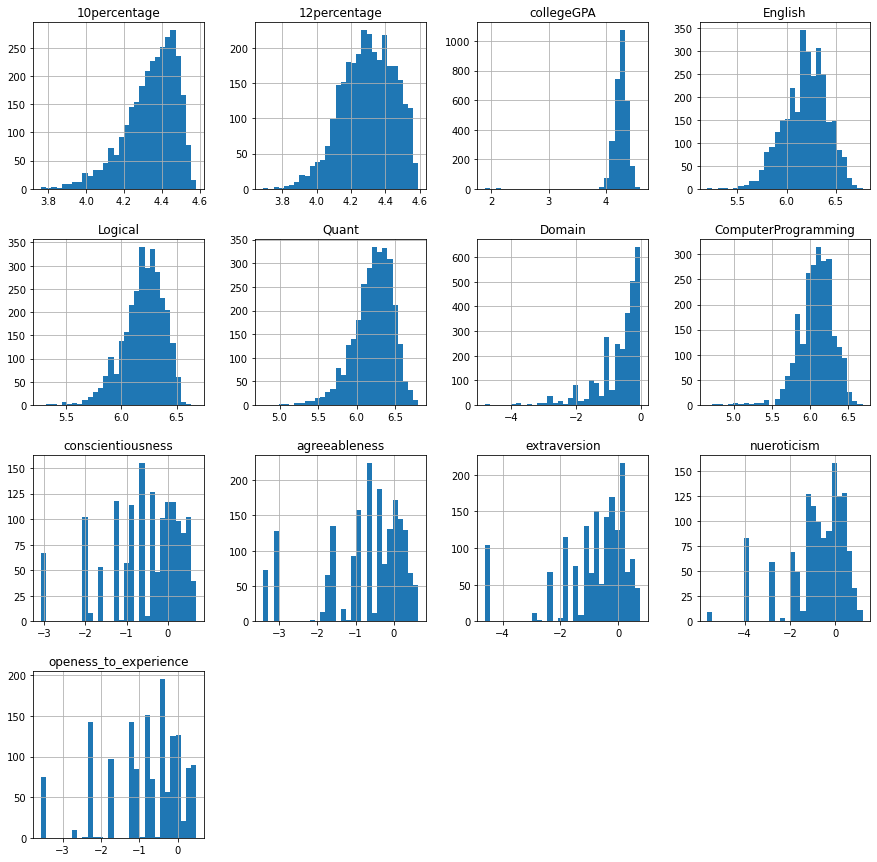

In [166]:
temp_log = data.copy()

for var in cont_vars:
    temp_log[var] = np.log(data[var])

temp_log[cont_vars].hist(bins=30, figsize=(15, 15))
plt.show

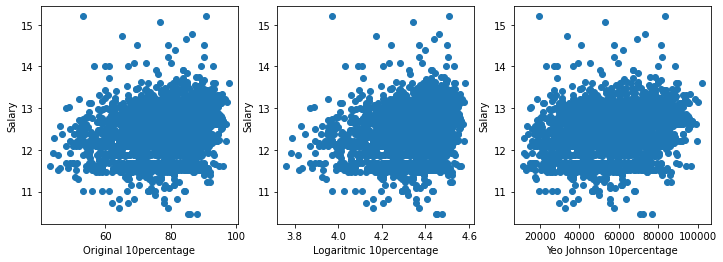

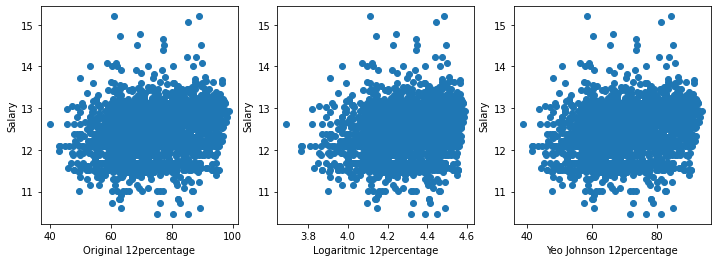

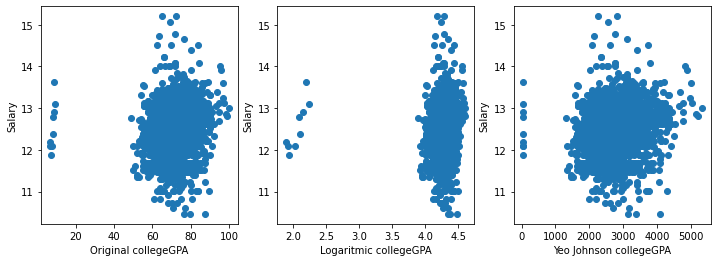

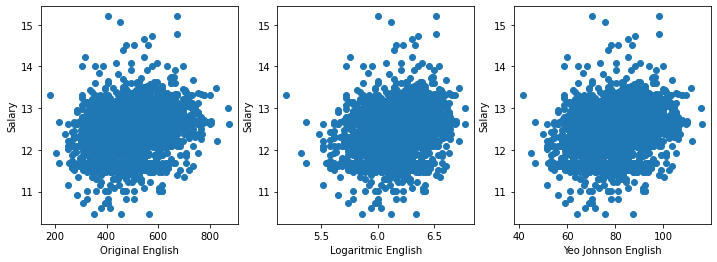

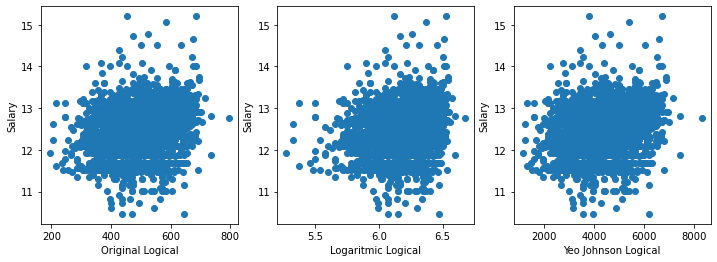

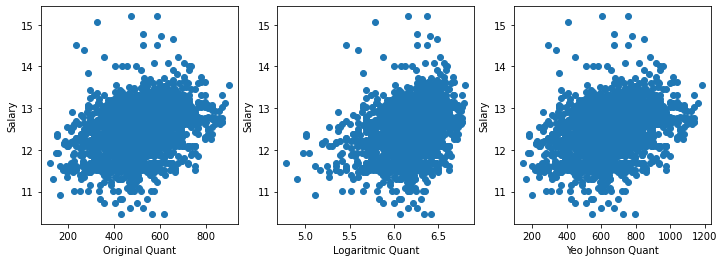

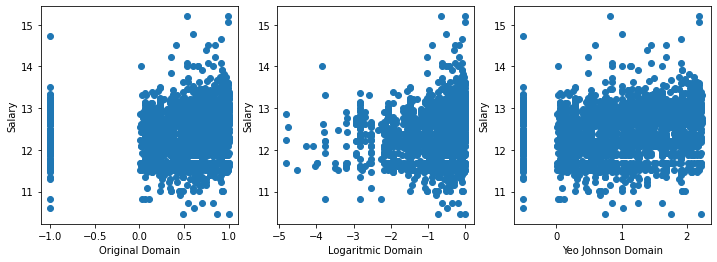

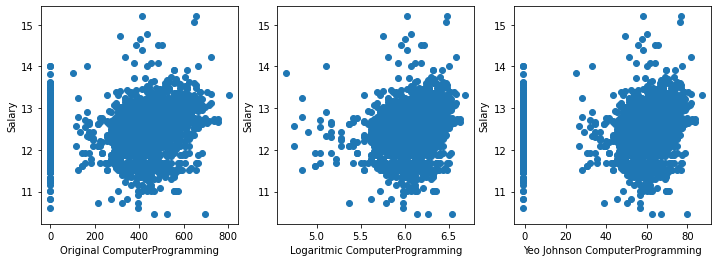

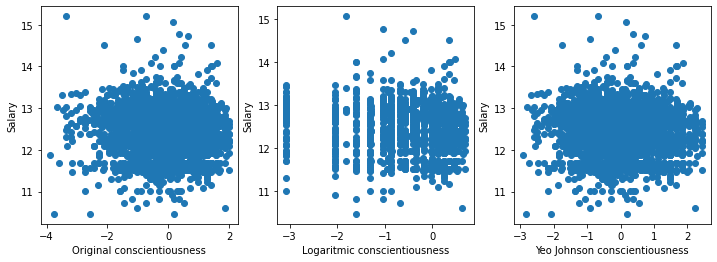

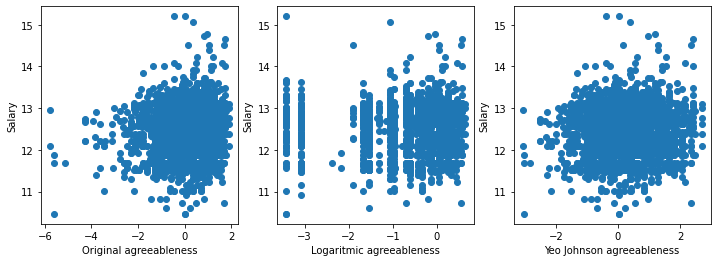

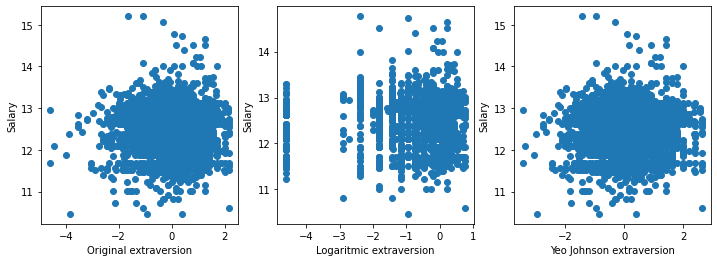

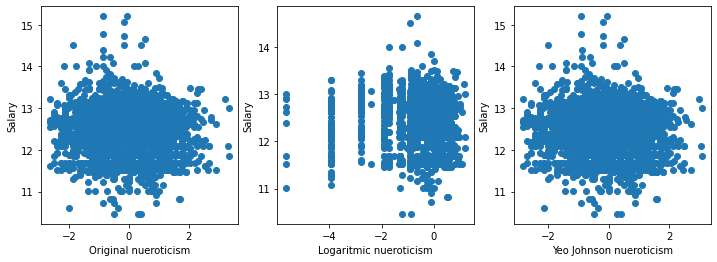

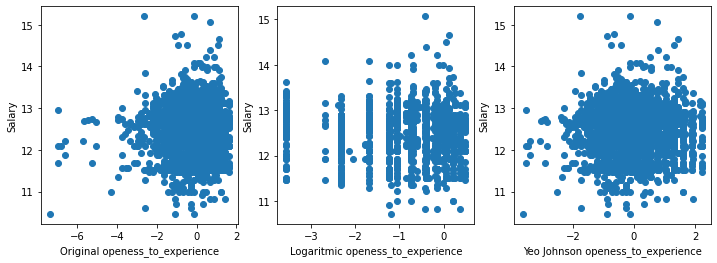

In [167]:
for var in cont_vars:
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 3, 1)
    plt.scatter(data[var], np.log(data['Salary']))
    plt.ylabel('Salary')
    plt.xlabel('Original ' + var)
    
    plt.subplot(1, 3, 2)
    plt.scatter(temp_log[var], np.log(data['Salary']))
    plt.ylabel('Salary')
    plt.xlabel('Logaritmic ' + var)
    
    plt.subplot(1, 3, 3)
    plt.scatter(temp_yj[var], np.log(data['Salary']))
    plt.ylabel('Salary')
    plt.xlabel('Yeo Johnson ' + var)
    
    plt.show()

In [169]:
yj_vars = ['10percentage', '12percentage', 'collegeGPA', 'English', 'Logical', 'Quant', 'Domain', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']

De acuerdo a las pruebas de transformaciones realizadas, se separaron las variables contínuas sobre las que se aplicará la transformación Yeo Johnson.  La transformación logarítmica no se considera adecuada para ninguna variable.  La variable 'computerprogramming' se mantendrá con su distribución original.

#### 1.6.3. Variables con sesgo fuerte

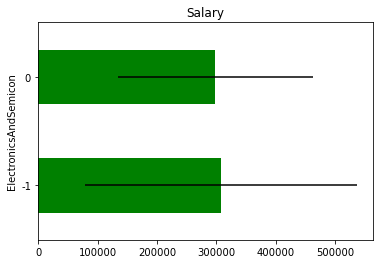

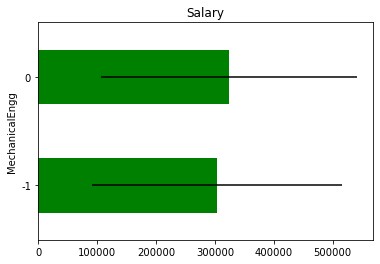

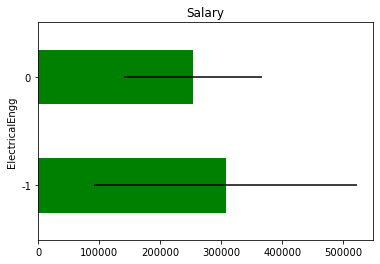

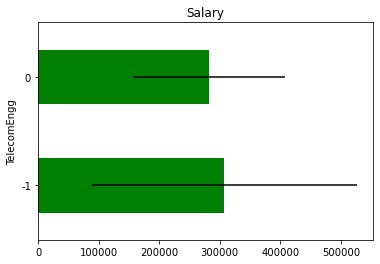

In [170]:
for var in sesgadas:
    temp = data.copy()
    
    temp[var] = np.where(data[var] == -1, -1, 0)
    
    temp = temp.groupby(var)['Salary'].agg(['mean', 'std'])
    
    temp.plot(kind='barh', y='mean', legend=False, xerr='std', title = 'Salary', color='green')
    plt.show()

### 1.7. Análisis de Variables Categóricas

In [126]:
cat_vars = [var for var in cat_vars if var not in temp_vars]
len(cat_vars)

7

In [127]:
data[cat_vars].head()

,Gender,10board,12board,Degree,Specialization,CollegeState,CollegeID
0,f,cbse,cbse,B.Tech/B.E.,instrumentation and control engineering,Delhi,6920
1,m,cbse,cbse,B.Tech/B.E.,computer science & engineering,Uttar Pradesh,6624
2,m,"maharashtra state board,pune",amravati divisional board,B.Tech/B.E.,electronics & telecommunications,Maharashtra,9084
3,m,cbse,cbse,B.Tech/B.E.,computer science & engineering,Delhi,8195
4,f,cbse,cbse,B.Tech/B.E.,biotechnology,Tamil Nadu,4889


<AxesSubplot:>

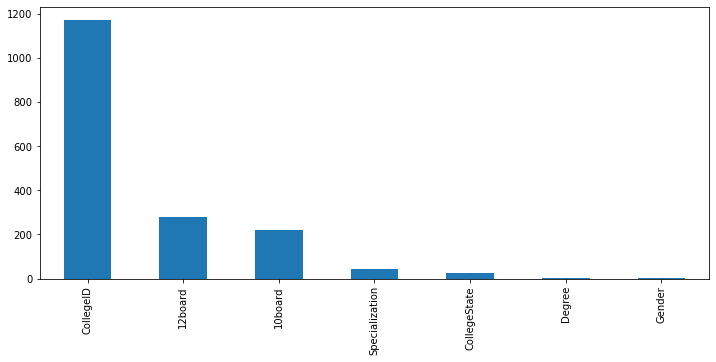

In [128]:
data[cat_vars].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))

In [140]:
len(np.unique(data['CollegeID']))

1173

In [141]:
len(np.unique(data['12board']))

277

In [142]:
len(np.unique(data['10board']))

221

In [143]:
len(np.unique(data['Specialization']))

42

In [144]:
len(np.unique(data['CollegeState']))

26

In [145]:
len(np.unique(data['Degree']))

4

In [146]:
len(np.unique(data['Gender']))

2

Por el tipo de categorías y que en algunos casos son una cantidad significativa de categorías, se decide hacer para todas un mapeo de frecuencias.

### 1.8. Rare Labels

In [138]:
def analyse_rare_labels(df, var, rare_perc):
    temp = df.groupby(var)['Salary'].count()/len(df)
    
    return temp[temp < rare_perc]

In [139]:
for var in cat_vars:
    print(analyse_rare_labels(data, var, 0.01))
    print()

Series([], Name: Salary, dtype: float64)

10board
aisse                                        0.000334
andhra pradesh board ssc                     0.000334
andhra pradesh state board                   0.000334
anglo indian                                 0.001001
ap state board                               0.000334
                                               ...   
uttranchal board                             0.000334
wbbsce                                       0.000334
wbbse                                        0.004670
west bengal  board of secondary education    0.000334
west bengal board of secondary education     0.001668
Name: Salary, Length: 215, dtype: float64

12board
 board of intermediate                               0.000334
aissce                                               0.000334
aligarh muslim university                            0.000334
all india board                                      0.000334
amravati divisional board                            0.00

En el caso de la variable 'Degree' que solo tiene una etiqueta rara de 4, no se aplicará el mapeo de etiquetas raras, aunque al final sería casi el mismo resultado aplicándola.  La variable Gender como son únicamente 2 categorías no tiene etiquetas raras.

In [156]:
no_rare_vars = ['Gender', 'Degree']

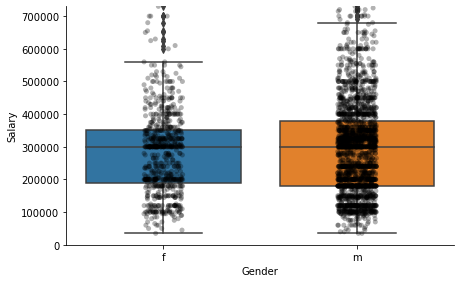

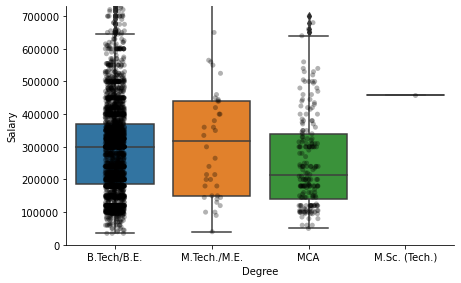

In [159]:
ylim_sup = data['Salary'].mean() + (data['Salary'].std()*2)
for var in no_rare_vars:
    sns.catplot(x=var, y='Salary', data=data, kind='box', height=4, aspect=1.5)
    sns.stripplot(x=var, y='Salary', data=data, jitter=0.1, alpha=0.3, color='k')
    plt.ylim([0, ylim_sup])
    plt.show()

Para el caso de las variables no raras, el género parece no impactar en la media de salario.  Por otro lado, el grado sí impacta.

In [160]:
rare_vars = [var for var in cat_vars if var not in no_rare_vars]
rare_vars

['10board', '12board', 'Specialization', 'CollegeState', 'CollegeID']